In [1]:
# !pip install pandas_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"/content/sample_data/FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding='latin-1')

In [3]:
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [5]:
data.groupby('Item').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",77779,1518715,2275409,155038.96,158104.08,156218.90,157752.59,163987.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,87073,1639683,2654934,232670.13,234710.51,239377.07,240047.62,242645.19


In [6]:
data.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [8]:
data['Y2016'].isnull().sum()

1535

In [9]:
data.corr()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


In [15]:
data.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [20]:
data[['Element', 'Y2018']].groupby('Element').sum().sort_values(by='Y2018')

,Y2018
Element,
Tourist consumption,90.00
Fat supply quantity (g/capita/day),10258.69
Protein supply quantity (g/capita/day),11833.56
Stock Variation,20577.91
Seed,25263.14
Residuals,34864.00
Food supply quantity (kg/capita/yr),49056.85
Other uses (non-food),91300.97
Losses,163902.00


In [28]:
data[data['Area']== 'Algeria'].groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,464,311204,614916,83755.94,85972.86,87157.61,86810.42,90023.42
Export Quantity,392,264011,579278,1328.64,1104.62,1340.22,1494.54,811.54
Fat supply quantity (g/capita/day),432,291489,73872,320.19,317.40,309.54,320.74,309.09
Feed,88,58967,121462,9656.04,10308.00,9903.00,9571.00,10668.00
Food,420,282744,539910,60582.69,61693.49,63081.43,62785.33,63736.33
Food supply (kcal/capita/day),432,291489,71712,13500.00,13512.00,13483.00,13363.00,13288.00
Food supply quantity (kg/capita/yr),420,282744,67725,1556.45,1552.81,1555.77,1516.94,1509.28
Import Quantity,448,301030,628432,34940.12,37841.91,36736.08,36059.29,36238.29
Losses,208,139857,266396,7231.00,7471.00,7405.00,7428.00,7708.00


In [29]:
len(data['Area'].unique())

49

In [13]:
data.dropna(inplace=True)

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57784 entries, 0 to 57783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     57784 non-null  int64  
 1   Area          57784 non-null  object 
 2   Item Code     57784 non-null  int64  
 3   Item          57784 non-null  object 
 4   Element Code  57784 non-null  int64  
 5   Element       57784 non-null  object 
 6   Unit          57784 non-null  object 
 7   Y2014         57784 non-null  float64
 8   Y2015         57784 non-null  float64
 9   Y2016         57784 non-null  float64
 10  Y2017         57784 non-null  float64
 11  Y2018         57784 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.3+ MB


In [ ]:
data.iloc[3]

Area Code                                            4
Area                                           Algeria
Item Code                                         2901
Item                                       Grand Total
Element Code                                       674
Element         Protein supply quantity (g/capita/day)
Unit                                      g/capita/day
Y2014                                             94.9
Y2015                                            94.35
Y2016                                            94.72
Y2017                                            92.82
Y2018                                            91.83
Name: 3, dtype: object

In [ ]:
data.loc[3]

Area Code                                            4
Area                                           Algeria
Item Code                                         2901
Item                                       Grand Total
Element Code                                       674
Element         Protein supply quantity (g/capita/day)
Unit                                      g/capita/day
Y2014                                             94.9
Y2015                                            94.35
Y2016                                            94.72
Y2017                                            92.82
Y2018                                            91.83
Name: 3, dtype: object

In [ ]:
data.at[6, 'Item']

'Vegetal Products'

In [ ]:
data.iat[6, 3]

'Vegetal Products'

In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Area Code        134.499342
Item Code       2690.495656
Element Code    3745.422868
Y2014            137.831770
Y2015            138.990488
Y2016            140.376380
Y2017            144.927790
Y2018            148.027664
dtype: float64

In [ ]:
data.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000
mean,134.499342,2690.495656,3745.422868,137.831770,138.990488,140.376380,144.927790,148.027664
std,72.651212,146.625825,2217.914615,1588.660769,1625.441821,1662.732983,1695.436448,1735.920219
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2563.000000,674.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2633.000000,5142.000000,0.140000,0.130000,0.130000,0.160000,0.130000
75%,196.000000,2781.000000,5301.000000,9.000000,9.000000,9.000000,10.000000,10.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [ ]:
#using groupby to count the sum of each unique value in the Item column
print(data.groupby('Item')['Item'].count())

Item
Alcohol, Non-Food      261
Alcoholic Beverages    553
Animal Products        135
Animal fats            627
Apples and products    505
                      ... 
Vegetables, Other      566
Vegetal Products       135
Wheat and products     640
Wine                   478
Yams                   297
Name: Item, Length: 119, dtype: int64


In [ ]:
#using groupby to count the sum of each unique value in the Element column
print(data.groupby('Element')['Element'].count())

Element
Domestic supply quantity                  5213
Export Quantity                           2914
Fat supply quantity (g/capita/day)        4928
Feed                                      1089
Food                                      4866
Food supply (kcal/capita/day)             4905
Food supply quantity (kg/capita/yr)       4830
Import Quantity                           4652
Losses                                    2008
Other uses (non-food)                     1525
Processing                                1978
Production                                3805
Protein supply quantity (g/capita/day)    4925
Residuals                                 4573
Seed                                       758
Stock Variation                           4215
Total Population - Both sexes               45
Tourist consumption                        555
Name: Element, dtype: int64


In [ ]:
#using groupby to count the sum of each unique value in the Area column
print(data.groupby('Area')['Area'].count())

Area
Algeria                        1244
Angola                         1350
Benin                          1212
Botswana                       1342
Burkina Faso                   1343
Cabo Verde                     1161
Cameroon                       1415
Central African Republic       1242
Chad                           1232
Comoros                          45
Congo                          1336
Côte d'Ivoire                  1431
Djibouti                       1021
Egypt                          1437
Eswatini                       1206
Ethiopia                       1390
Ethiopia PDR                     39
Gabon                          1166
Gambia                         1066
Ghana                          1311
Guinea                         1323
Guinea-Bissau                   992
Kenya                          1521
Lesotho                        1053
Liberia                        1070
Madagascar                     1405
Malawi                         1363
Mali                   

In [ ]:
data.duplicated().any()

False

In [ ]:
# plt.figure(figsize=(27,24))
# plt.xticks(rotation=90)

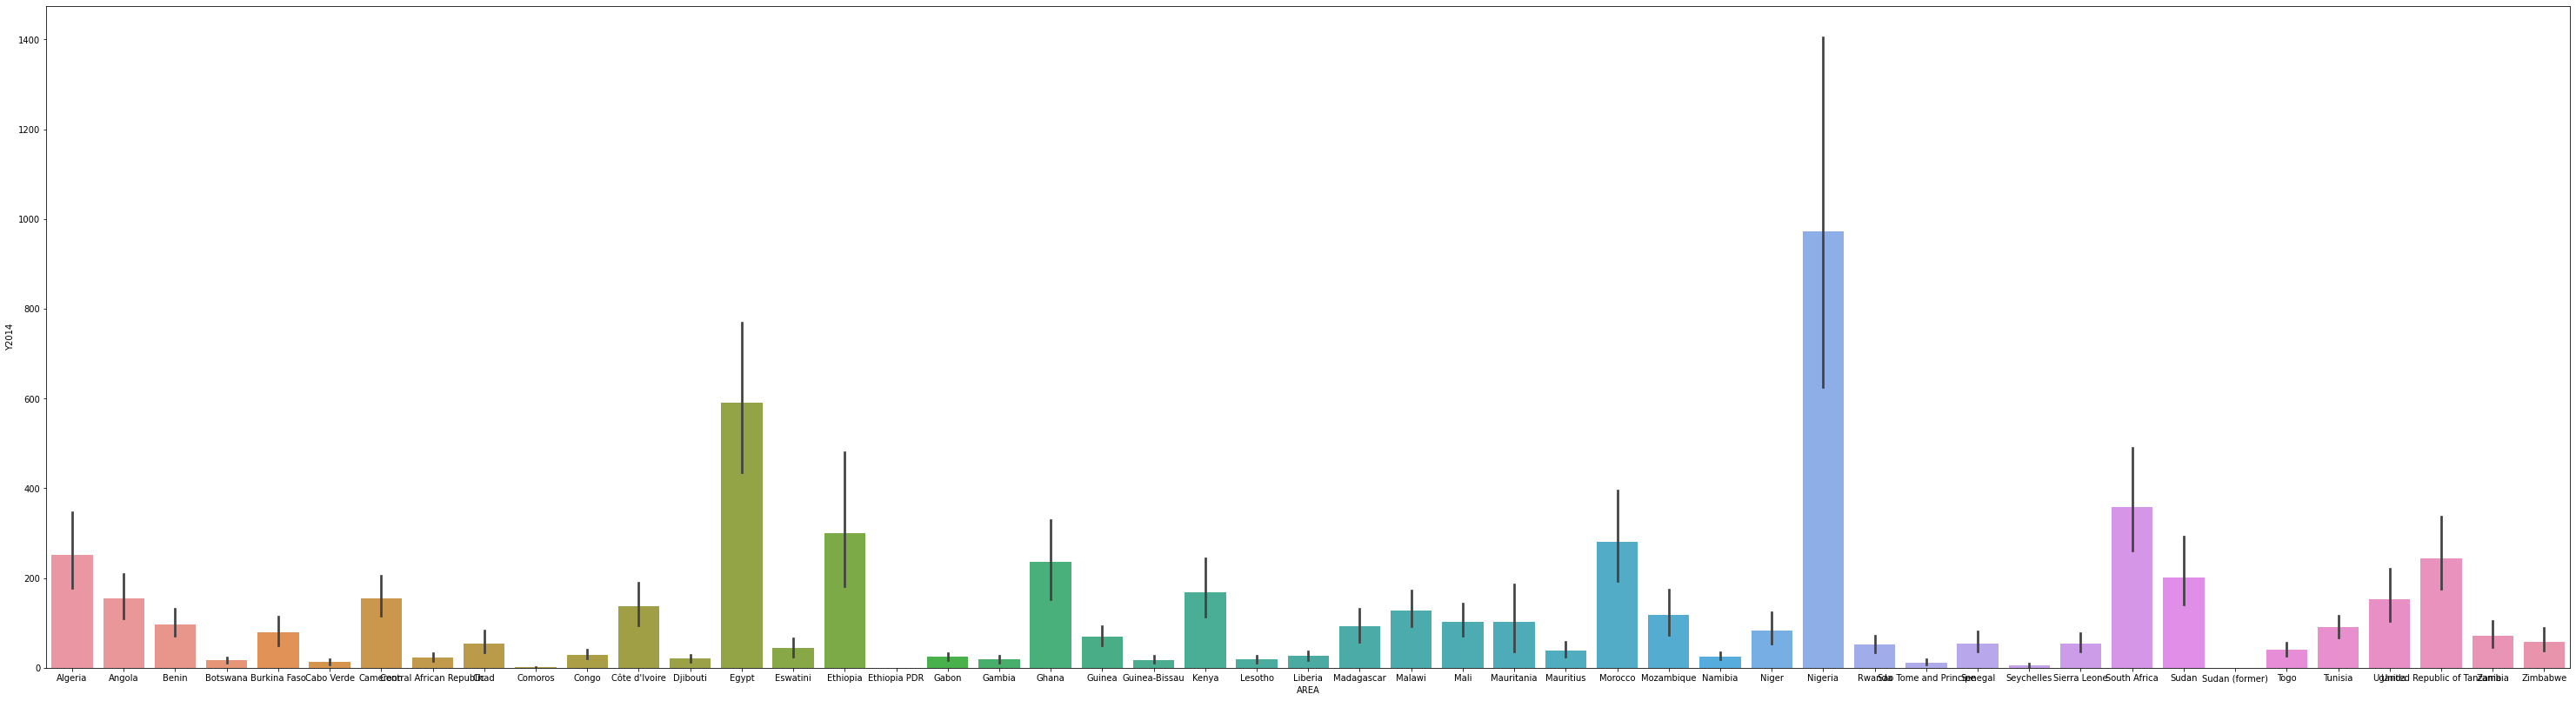

In [ ]:
plt.figure(figsize=(52,14))
sns.barplot(data=data, x='Area', y='Y2014')
plt.xlabel('AREA')
plt.show()

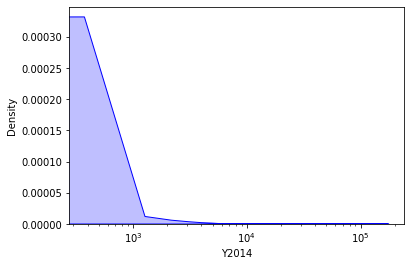

In [ ]:
# KDE plot
g = sns.kdeplot(data['Y2014'], shade=True, color="b")
g.set_xscale("log")

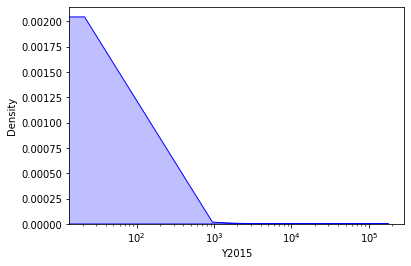

In [ ]:
# KDE plot
g = sns.kdeplot(data['Y2015'], shade=True, color="b")
g.set_xscale("log")

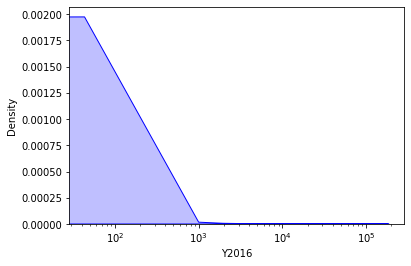

In [ ]:
# KDE plot
g = sns.kdeplot(data['Y2016'], shade=True, color="b")
g.set_xscale("log")

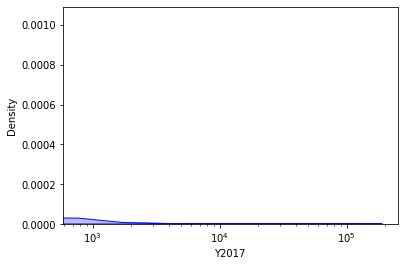

In [ ]:
# KDE plot
g = sns.kdeplot(data['Y2017'], shade=True, color="b")
g.set_xscale("log")

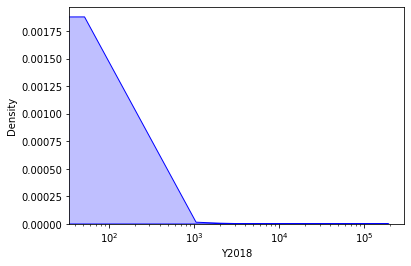

In [ ]:
# KDE plot
g = sns.kdeplot(data['Y2018'], shade=True, color="b")
g.set_xscale("log")

In [ ]:
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


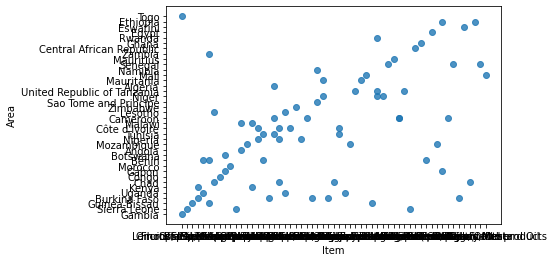

In [ ]:
sample_df = data.sample(n=80, random_state=4)
sns.regplot(x=sample_df["Item"], y=sample_df["Area"],
fit_reg=False)